# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [22]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import logging
from sklearn.model_selection import ParameterGrid

In [23]:
logging.basicConfig(
    format='%(asctime)s %(levelname)s: %(message)s',
    level=logging.DEBUG
)

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
# Define transforms
## YOUR CODE HERE ##
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize(
#     (0.5,),
#     (0.5,)
#     )
# ])
transform = transforms.ToTensor()

# Create training set and define training dataloader
## YOUR CODE HERE ##
trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=64,
    shuffle=True
)

# Create test set and define test dataloader
## YOUR CODE HERE ##
testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False
)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [24]:
logging.getLogger('matplotlib').setLevel(logging.WARNING)

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


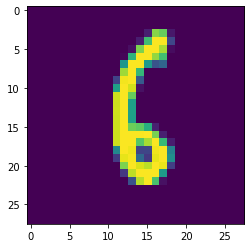

9


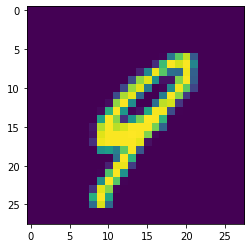

4


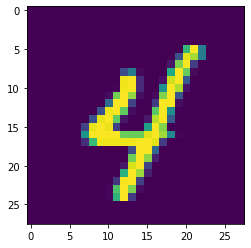

3


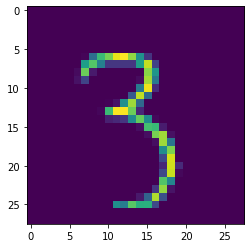

3


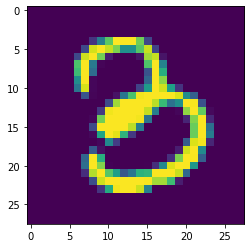

In [8]:
# Explore data
## YOUR CODE HERE ##
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

model = Net()  

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
## YOUR CODE HERE ##
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    model.parameters(),
    lr=0.001
)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

Plot the training loss (and validation loss/accuracy, if recorded).

In [11]:
class MNISTTrainer:
    """
    A class to encapsulate the training and evaluation of a neural network on the MNIST dataset.
    
    Attributes:
        model (nn.Module): The neural network model to train.
        trainloader (DataLoader): DataLoader for the training dataset.
        testloader (DataLoader): DataLoader for the testing dataset.
        criterion (nn.Module): Loss function.
        optimizer (torch.optim.Optimizer): Optimizer for updating the model parameters.
        device (torch.device): Device to run the training on (CPU or GPU).
        train_losses (list): List to store training losses.
        val_losses (list): List to store validation losses.
        val_accuracies (list): List to store validation accuracies.
    """
    
    def __init__(self, model, trainloader, testloader, criterion, optimizer, device):
        """
        Initializes the MNISTTrainer with the given model, dataloaders, criterion, optimizer, and device.
        
        Args:
            model (nn.Module): The neural network model to train.
            trainloader (DataLoader): DataLoader for the training dataset.
            testloader (DataLoader): DataLoader for the testing dataset.
            criterion (nn.Module): Loss function.
            optimizer (torch.optim.Optimizer): Optimizer for updating the model parameters.
            device (torch.device): Device to run the training on (CPU or GPU).
        """
        self.model = model
        self.trainloader = trainloader
        self.testloader = testloader
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device
        self.train_losses = []
        self.val_losses = []
        self.val_accuracies = []

    def train(self, epochs):
        """
        Trains the model for a specified number of epochs, logging training and validation metrics.
        
        Args:
            epochs (int): The number of epochs to train the model.
        """
        self.model.to(self.device)
        logging.info("Starting training model")

        for epoch in range(epochs):
            self.model.train()
            running_loss = 0.0
            
            for i, data in enumerate(trainloader, 0):
                inputs, labels = data
                inputs, labels = inputs.to(self.device), labels.to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()

                running_loss += loss.item()

                if i % 250 == 249:
                    logging.info(
                        f"[Epoch: {epoch + 1}, {i + 1}] loss: {running_loss / 250:.3f}"
                    )

            self.train_losses.append(running_loss / len(self.trainloader))
            logging.info(f"Epoch {epoch+1}/{epochs}, Train Loss: {self.train_losses[-1]:.3f}")
            self.validate(epoch, epochs)
        
        logging.info("Training completed")
        self.plot_metrics(epochs)
    
    def validate(self, epoch, epochs):
        """
        Validates the model on the validation set, logging validation metrics.
        
        Args:
            epoch (int): The current epoch number.
            epochs (int): The total number of epochs.
        """
        self.model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for data in self.testloader:
                images, labels = data
                images, labels = images.to(self.device), labels.to(self.device)
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        self.val_losses.append(val_loss / len(self.testloader))
        self.val_accuracies.append(100 * correct / total)
        
        logging.info(
            f"Epoch {epoch+1}/{epochs}, "
            f"Val Loss: {self.val_losses[-1]:.3f}, "
            f"Val Accuracy: {self.val_accuracies[-1]:.2f}%"
        )
        
    
    def plot_metrics(self, epochs):
        """
        Plots the training and validation losses and accuracies.
        
        Args:
            epochs (int): The number of epochs the model was trained for.
        """
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, epochs + 1), self.train_losses, label='Train Loss')
        plt.plot(range(1, epochs + 1), self.val_losses, label='Val Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, epochs + 1), self.val_accuracies, label='Val Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy (%)')
        plt.title('Validation Accuracy')
        plt.legend()

        plt.show()

2024-06-14 17:50:15,404 INFO: Starting training model
2024-06-14 17:50:17,423 INFO: [Epoch: 1, 250] loss: 0.438
2024-06-14 17:50:19,163 INFO: [Epoch: 1, 500] loss: 0.639
2024-06-14 17:50:20,910 INFO: [Epoch: 1, 750] loss: 0.789
2024-06-14 17:50:22,280 INFO: Epoch 1/10, Train Loss: 0.237
2024-06-14 17:50:23,384 INFO: Epoch 1/10, Val Loss: 0.099, Val Accuracy: 96.90%
2024-06-14 17:50:25,396 INFO: [Epoch: 2, 250] loss: 0.092
2024-06-14 17:50:27,155 INFO: [Epoch: 2, 500] loss: 0.186
2024-06-14 17:50:28,937 INFO: [Epoch: 2, 750] loss: 0.267
2024-06-14 17:50:30,375 INFO: Epoch 2/10, Train Loss: 0.089
2024-06-14 17:50:31,441 INFO: Epoch 2/10, Val Loss: 0.075, Val Accuracy: 97.46%
2024-06-14 17:50:33,479 INFO: [Epoch: 3, 250] loss: 0.061
2024-06-14 17:50:35,250 INFO: [Epoch: 3, 500] loss: 0.121
2024-06-14 17:50:37,038 INFO: [Epoch: 3, 750] loss: 0.176
2024-06-14 17:50:38,476 INFO: Epoch 3/10, Train Loss: 0.058
2024-06-14 17:50:39,551 INFO: Epoch 3/10, Val Loss: 0.070, Val Accuracy: 97.55%
2024

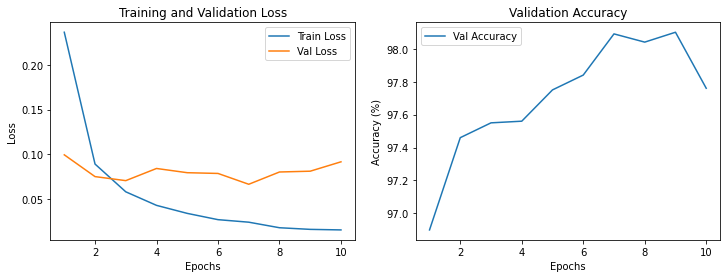

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
trainer = MNISTTrainer(model, trainloader, testloader, criterion, optimizer, device)
trainer.train(epochs=10)

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [17]:
## YOUR CODE HERE ##
def test_model(model, testloader, device):
    """
    Evaluate the model on the test dataset.

    Args:
        model (nn.Module): The neural network model to test.
        testloader (DataLoader): DataLoader for the test dataset.
        device (torch.device): Device to run the evaluation on (CPU or GPU).

    Returns:
        float: Accuracy of the model on the test dataset.
    """
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy= 100 * correct/total
    print(f'Accuracy on test images is {accuracy:.2f}%')
    return accuracy

accuracy = test_model(model, testloader, device)

Accuracy on test images is 97.76%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [20]:
def retrain_model(model, trainloader, testloader, criterion, device, learning_rate=0.001, epochs=10):
    """
    Retrain the model with new hyperparameters.

    Args:
        model (nn.Module): The neural network model to retrain.
        trainloader (DataLoader): DataLoader for the training dataset.
        testloader (DataLoader): DataLoader for the testing dataset.
        criterion (nn.Module): Loss function.
        device (torch.device): Device to run the training on (CPU or GPU).
        learning_rate (float, optional): Learning rate for the optimizer. Defaults to 0.001.
        epochs (int, optional): Number of epochs for training. Defaults to 10.
    
    Returns:
        nn.Module: The retrained model.
    """
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    trainer = MNISTTrainer(model, trainloader, testloader, criterion, optimizer, device)
    trainer.train(epochs)
    return model

2024-06-14 18:03:10,428 INFO: Starting training model
2024-06-14 18:03:12,458 INFO: [Epoch: 1, 250] loss: 0.000
2024-06-14 18:03:14,263 INFO: [Epoch: 1, 500] loss: 0.000
2024-06-14 18:03:16,055 INFO: [Epoch: 1, 750] loss: 0.000
2024-06-14 18:03:17,478 INFO: Epoch 1/10, Train Loss: 0.000
2024-06-14 18:03:18,572 INFO: Epoch 1/10, Val Loss: 0.095, Val Accuracy: 98.58%
2024-06-14 18:03:20,631 INFO: [Epoch: 2, 250] loss: 0.000
2024-06-14 18:03:22,442 INFO: [Epoch: 2, 500] loss: 0.000
2024-06-14 18:03:24,242 INFO: [Epoch: 2, 750] loss: 0.000
2024-06-14 18:03:25,586 INFO: Epoch 2/10, Train Loss: 0.000
2024-06-14 18:03:26,748 INFO: Epoch 2/10, Val Loss: 0.099, Val Accuracy: 98.63%
2024-06-14 18:03:28,797 INFO: [Epoch: 3, 250] loss: 0.000
2024-06-14 18:03:30,596 INFO: [Epoch: 3, 500] loss: 0.000
2024-06-14 18:03:32,410 INFO: [Epoch: 3, 750] loss: 0.000
2024-06-14 18:03:33,779 INFO: Epoch 3/10, Train Loss: 0.000
2024-06-14 18:03:34,935 INFO: Epoch 3/10, Val Loss: 0.099, Val Accuracy: 98.63%
2024

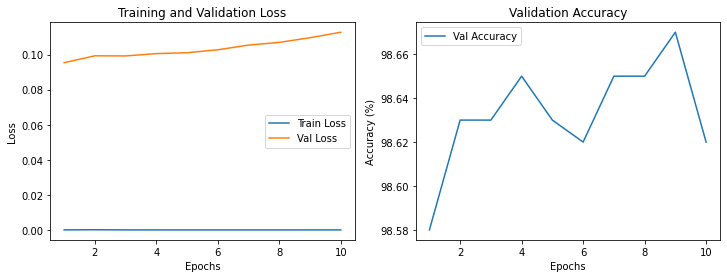

Accuracy on test images is 98.62%


In [21]:
model = retrain_model(model, trainloader, testloader, criterion, device, learning_rate=0.0001, epochs=10)
accuracy = test_model(model, testloader, device)

In [25]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = CNN()


In [26]:
param_grid = {
    'learning_rate': [0.001, 0.0001],
    'batch_size': [64, 128],
    'optimizer': ['Adam', 'SGD']
}

grid = ParameterGrid(param_grid)

2024-06-14 18:06:03,439 INFO: Starting training model


Training with params: {'batch_size': 64, 'learning_rate': 0.001, 'optimizer': 'Adam'}


2024-06-14 18:06:05,798 INFO: [Epoch: 1, 250] loss: 0.425
2024-06-14 18:06:07,876 INFO: [Epoch: 1, 500] loss: 0.534
2024-06-14 18:06:09,966 INFO: [Epoch: 1, 750] loss: 0.617
2024-06-14 18:06:11,581 INFO: Epoch 1/10, Train Loss: 0.180
2024-06-14 18:06:12,827 INFO: Epoch 1/10, Val Loss: 0.052, Val Accuracy: 98.28%
2024-06-14 18:06:15,250 INFO: [Epoch: 2, 250] loss: 0.056
2024-06-14 18:06:17,359 INFO: [Epoch: 2, 500] loss: 0.105
2024-06-14 18:06:19,442 INFO: [Epoch: 2, 750] loss: 0.155
2024-06-14 18:06:21,080 INFO: Epoch 2/10, Train Loss: 0.050
2024-06-14 18:06:22,272 INFO: Epoch 2/10, Val Loss: 0.039, Val Accuracy: 98.76%
2024-06-14 18:06:24,622 INFO: [Epoch: 3, 250] loss: 0.034
2024-06-14 18:06:26,703 INFO: [Epoch: 3, 500] loss: 0.068
2024-06-14 18:06:28,787 INFO: [Epoch: 3, 750] loss: 0.102
2024-06-14 18:06:30,479 INFO: Epoch 3/10, Train Loss: 0.034
2024-06-14 18:06:31,614 INFO: Epoch 3/10, Val Loss: 0.034, Val Accuracy: 98.77%
2024-06-14 18:06:33,953 INFO: [Epoch: 4, 250] loss: 0.019


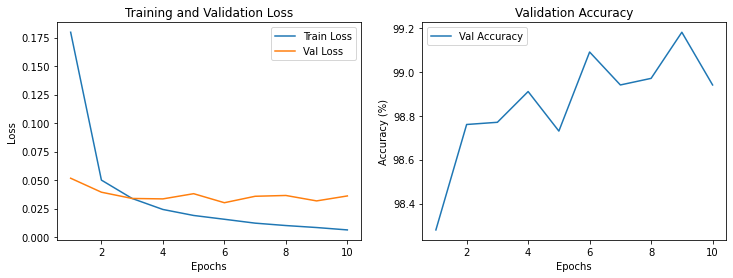

2024-06-14 18:07:38,900 INFO: Starting training model


Accuracy on test images is 98.94%
Training with params: {'batch_size': 64, 'learning_rate': 0.001, 'optimizer': 'SGD'}


2024-06-14 18:07:41,212 INFO: [Epoch: 1, 250] loss: 2.230
2024-06-14 18:07:43,263 INFO: [Epoch: 1, 500] loss: 3.464
2024-06-14 18:07:45,315 INFO: [Epoch: 1, 750] loss: 3.906
2024-06-14 18:07:46,879 INFO: Epoch 1/10, Train Loss: 1.116
2024-06-14 18:07:48,139 INFO: Epoch 1/10, Val Loss: 0.329, Val Accuracy: 90.25%
2024-06-14 18:07:50,455 INFO: [Epoch: 2, 250] loss: 0.319
2024-06-14 18:07:52,506 INFO: [Epoch: 2, 500] loss: 0.612
2024-06-14 18:07:54,559 INFO: [Epoch: 2, 750] loss: 0.866
2024-06-14 18:07:56,274 INFO: Epoch 2/10, Train Loss: 0.280
2024-06-14 18:07:57,364 INFO: Epoch 2/10, Val Loss: 0.223, Val Accuracy: 93.32%
2024-06-14 18:07:59,703 INFO: [Epoch: 3, 250] loss: 0.221
2024-06-14 18:08:01,784 INFO: [Epoch: 3, 500] loss: 0.413
2024-06-14 18:08:03,842 INFO: [Epoch: 3, 750] loss: 0.600
2024-06-14 18:08:05,476 INFO: Epoch 3/10, Train Loss: 0.195
2024-06-14 18:08:06,667 INFO: Epoch 3/10, Val Loss: 0.155, Val Accuracy: 94.98%
2024-06-14 18:08:08,976 INFO: [Epoch: 4, 250] loss: 0.163


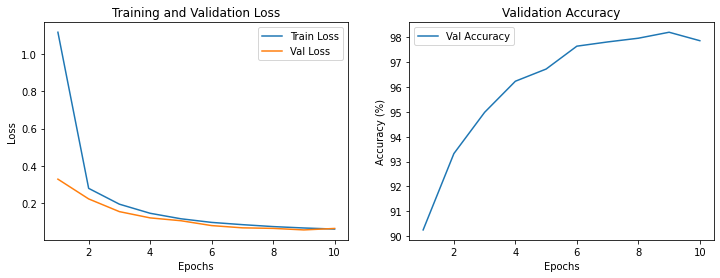

2024-06-14 18:09:12,695 INFO: Starting training model


Accuracy on test images is 97.86%
Training with params: {'batch_size': 64, 'learning_rate': 0.0001, 'optimizer': 'Adam'}


2024-06-14 18:09:15,067 INFO: [Epoch: 1, 250] loss: 1.273
2024-06-14 18:09:17,153 INFO: [Epoch: 1, 500] loss: 1.694
2024-06-14 18:09:19,257 INFO: [Epoch: 1, 750] loss: 1.996
2024-06-14 18:09:20,977 INFO: Epoch 1/10, Train Loss: 0.583
2024-06-14 18:09:22,142 INFO: Epoch 1/10, Val Loss: 0.224, Val Accuracy: 93.33%
2024-06-14 18:09:24,493 INFO: [Epoch: 2, 250] loss: 0.214
2024-06-14 18:09:26,573 INFO: [Epoch: 2, 500] loss: 0.401
2024-06-14 18:09:28,656 INFO: [Epoch: 2, 750] loss: 0.558
2024-06-14 18:09:30,474 INFO: Epoch 2/10, Train Loss: 0.180
2024-06-14 18:09:31,480 INFO: Epoch 2/10, Val Loss: 0.127, Val Accuracy: 96.19%
2024-06-14 18:09:33,830 INFO: [Epoch: 3, 250] loss: 0.127
2024-06-14 18:09:35,914 INFO: [Epoch: 3, 500] loss: 0.239
2024-06-14 18:09:38,010 INFO: [Epoch: 3, 750] loss: 0.341
2024-06-14 18:09:39,777 INFO: Epoch 3/10, Train Loss: 0.112
2024-06-14 18:09:40,853 INFO: Epoch 3/10, Val Loss: 0.089, Val Accuracy: 97.30%
2024-06-14 18:09:43,200 INFO: [Epoch: 4, 250] loss: 0.089


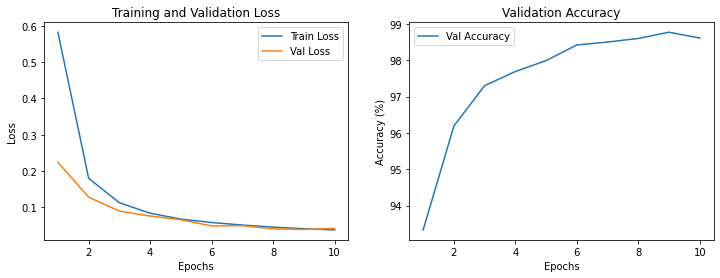

2024-06-14 18:10:47,965 INFO: Starting training model


Accuracy on test images is 98.61%
Training with params: {'batch_size': 64, 'learning_rate': 0.0001, 'optimizer': 'SGD'}


2024-06-14 18:10:50,263 INFO: [Epoch: 1, 250] loss: 2.296
2024-06-14 18:10:52,302 INFO: [Epoch: 1, 500] loss: 4.575
2024-06-14 18:10:54,357 INFO: [Epoch: 1, 750] loss: 6.838
2024-06-14 18:10:55,979 INFO: Epoch 1/10, Train Loss: 2.272
2024-06-14 18:10:57,169 INFO: Epoch 1/10, Val Loss: 2.235, Val Accuracy: 50.81%
2024-06-14 18:10:59,500 INFO: [Epoch: 2, 250] loss: 2.221
2024-06-14 18:11:01,547 INFO: [Epoch: 2, 500] loss: 4.405
2024-06-14 18:11:03,613 INFO: [Epoch: 2, 750] loss: 6.536
2024-06-14 18:11:05,179 INFO: Epoch 2/10, Train Loss: 2.156
2024-06-14 18:11:06,412 INFO: Epoch 2/10, Val Loss: 2.023, Val Accuracy: 64.89%
2024-06-14 18:11:08,712 INFO: [Epoch: 3, 250] loss: 1.962
2024-06-14 18:11:10,750 INFO: [Epoch: 3, 500] loss: 3.755
2024-06-14 18:11:12,799 INFO: [Epoch: 3, 750] loss: 5.317
2024-06-14 18:11:14,476 INFO: Epoch 3/10, Train Loss: 1.682
2024-06-14 18:11:15,598 INFO: Epoch 3/10, Val Loss: 1.206, Val Accuracy: 75.09%
2024-06-14 18:11:17,891 INFO: [Epoch: 4, 250] loss: 1.108


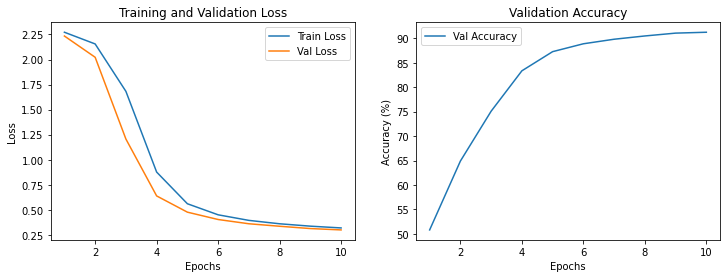

2024-06-14 18:12:21,694 INFO: Starting training model


Accuracy on test images is 91.24%
Training with params: {'batch_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam'}


2024-06-14 18:12:24,079 INFO: [Epoch: 1, 250] loss: 0.440
2024-06-14 18:12:26,196 INFO: [Epoch: 1, 500] loss: 0.554
2024-06-14 18:12:28,300 INFO: [Epoch: 1, 750] loss: 0.630
2024-06-14 18:12:29,888 INFO: Epoch 1/10, Train Loss: 0.364
2024-06-14 18:12:31,104 INFO: Epoch 1/10, Val Loss: 0.052, Val Accuracy: 98.35%
2024-06-14 18:12:33,478 INFO: [Epoch: 2, 250] loss: 0.053
2024-06-14 18:12:35,581 INFO: [Epoch: 2, 500] loss: 0.106
2024-06-14 18:12:37,674 INFO: [Epoch: 2, 750] loss: 0.154
2024-06-14 18:12:39,374 INFO: Epoch 2/10, Train Loss: 0.100
2024-06-14 18:12:40,491 INFO: Epoch 2/10, Val Loss: 0.032, Val Accuracy: 98.91%
2024-06-14 18:12:42,856 INFO: [Epoch: 3, 250] loss: 0.034
2024-06-14 18:12:44,960 INFO: [Epoch: 3, 500] loss: 0.069
2024-06-14 18:12:47,058 INFO: [Epoch: 3, 750] loss: 0.103
2024-06-14 18:12:48,679 INFO: Epoch 3/10, Train Loss: 0.067
2024-06-14 18:12:49,860 INFO: Epoch 3/10, Val Loss: 0.028, Val Accuracy: 99.03%
2024-06-14 18:12:52,239 INFO: [Epoch: 4, 250] loss: 0.027


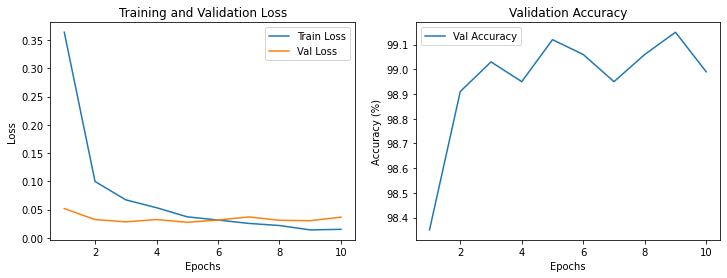

2024-06-14 18:13:56,925 INFO: Starting training model


Accuracy on test images is 98.99%
Training with params: {'batch_size': 128, 'learning_rate': 0.001, 'optimizer': 'SGD'}


2024-06-14 18:13:59,252 INFO: [Epoch: 1, 250] loss: 2.224
2024-06-14 18:14:01,300 INFO: [Epoch: 1, 500] loss: 3.389
2024-06-14 18:14:03,368 INFO: [Epoch: 1, 750] loss: 3.849
2024-06-14 18:14:05,074 INFO: Epoch 1/10, Train Loss: 2.196
2024-06-14 18:14:06,114 INFO: Epoch 1/10, Val Loss: 0.319, Val Accuracy: 90.61%
2024-06-14 18:14:08,421 INFO: [Epoch: 2, 250] loss: 0.306
2024-06-14 18:14:10,446 INFO: [Epoch: 2, 500] loss: 0.597
2024-06-14 18:14:12,496 INFO: [Epoch: 2, 750] loss: 0.856
2024-06-14 18:14:14,079 INFO: Epoch 2/10, Train Loss: 0.556
2024-06-14 18:14:15,337 INFO: Epoch 2/10, Val Loss: 0.207, Val Accuracy: 93.89%
2024-06-14 18:14:17,646 INFO: [Epoch: 3, 250] loss: 0.208
2024-06-14 18:14:19,694 INFO: [Epoch: 3, 500] loss: 0.406
2024-06-14 18:14:21,741 INFO: [Epoch: 3, 750] loss: 0.587
2024-06-14 18:14:23,376 INFO: Epoch 3/10, Train Loss: 0.382
2024-06-14 18:14:24,492 INFO: Epoch 3/10, Val Loss: 0.148, Val Accuracy: 95.42%
2024-06-14 18:14:26,792 INFO: [Epoch: 4, 250] loss: 0.163


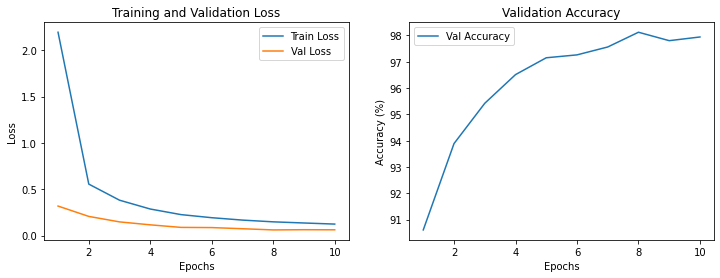

2024-06-14 18:15:29,821 INFO: Starting training model


Accuracy on test images is 97.94%
Training with params: {'batch_size': 128, 'learning_rate': 0.0001, 'optimizer': 'Adam'}


2024-06-14 18:15:32,140 INFO: [Epoch: 1, 250] loss: 1.285
2024-06-14 18:15:34,234 INFO: [Epoch: 1, 500] loss: 1.691
2024-06-14 18:15:36,324 INFO: [Epoch: 1, 750] loss: 1.988
2024-06-14 18:15:37,976 INFO: Epoch 1/10, Train Loss: 1.163
2024-06-14 18:15:39,106 INFO: Epoch 1/10, Val Loss: 0.229, Val Accuracy: 92.99%
2024-06-14 18:15:41,454 INFO: [Epoch: 2, 250] loss: 0.215
2024-06-14 18:15:43,584 INFO: [Epoch: 2, 500] loss: 0.400
2024-06-14 18:15:45,679 INFO: [Epoch: 2, 750] loss: 0.568
2024-06-14 18:15:47,375 INFO: Epoch 2/10, Train Loss: 0.364
2024-06-14 18:15:48,461 INFO: Epoch 2/10, Val Loss: 0.126, Val Accuracy: 96.34%
2024-06-14 18:15:50,807 INFO: [Epoch: 3, 250] loss: 0.139
2024-06-14 18:15:52,898 INFO: [Epoch: 3, 500] loss: 0.265
2024-06-14 18:15:54,973 INFO: [Epoch: 3, 750] loss: 0.375
2024-06-14 18:15:56,674 INFO: Epoch 3/10, Train Loss: 0.243
2024-06-14 18:15:57,749 INFO: Epoch 3/10, Val Loss: 0.092, Val Accuracy: 97.42%
2024-06-14 18:16:00,098 INFO: [Epoch: 4, 250] loss: 0.096


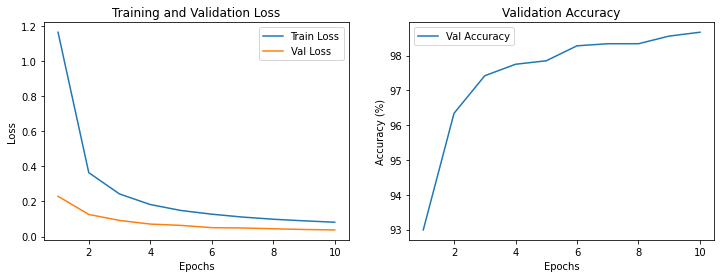

2024-06-14 18:17:04,609 INFO: Starting training model


Accuracy on test images is 98.67%
Training with params: {'batch_size': 128, 'learning_rate': 0.0001, 'optimizer': 'SGD'}


2024-06-14 18:17:06,910 INFO: [Epoch: 1, 250] loss: 2.299
2024-06-14 18:17:08,962 INFO: [Epoch: 1, 500] loss: 4.589
2024-06-14 18:17:11,002 INFO: [Epoch: 1, 750] loss: 6.871
2024-06-14 18:17:12,676 INFO: Epoch 1/10, Train Loss: 4.574
2024-06-14 18:17:13,752 INFO: Epoch 1/10, Val Loss: 2.269, Val Accuracy: 20.96%
2024-06-14 18:17:16,046 INFO: [Epoch: 2, 250] loss: 2.264
2024-06-14 18:17:18,074 INFO: [Epoch: 2, 500] loss: 4.512
2024-06-14 18:17:20,116 INFO: [Epoch: 2, 750] loss: 6.740
2024-06-14 18:17:21,680 INFO: Epoch 2/10, Train Loss: 4.477
2024-06-14 18:17:22,859 INFO: Epoch 2/10, Val Loss: 2.193, Val Accuracy: 51.69%
2024-06-14 18:17:25,160 INFO: [Epoch: 3, 250] loss: 2.176
2024-06-14 18:17:27,207 INFO: [Epoch: 3, 500] loss: 4.304
2024-06-14 18:17:29,241 INFO: [Epoch: 3, 750] loss: 6.361
2024-06-14 18:17:30,779 INFO: Epoch 3/10, Train Loss: 4.179
2024-06-14 18:17:31,952 INFO: Epoch 3/10, Val Loss: 1.912, Val Accuracy: 64.00%
2024-06-14 18:17:34,241 INFO: [Epoch: 4, 250] loss: 1.835


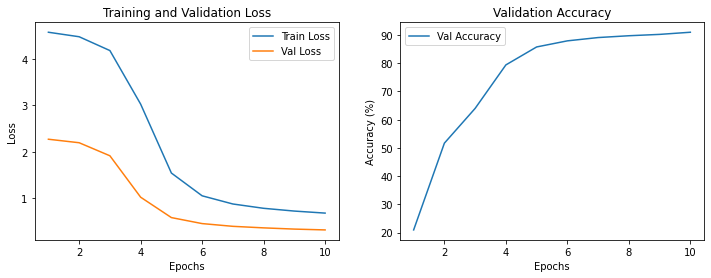

Accuracy on test images is 90.97%
Best accuracy: 98.99% with params: {'batch_size': 128, 'learning_rate': 0.001, 'optimizer': 'Adam'}


In [27]:
def train_model_with_params(params):
    batch_size = params['batch_size']
    learning_rate = params['learning_rate']
    optimizer_name = params['optimizer']

    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

    model = CNN().to(device)
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    trainer = MNISTTrainer(model, trainloader, testloader, criterion, optimizer, device)
    trainer.train(epochs=10)
    
    accuracy = test_model(model, testloader, device)
    return accuracy, params

best_accuracy = 0
best_params = None

for params in grid:
    print(f"Training with params: {params}")
    accuracy, params = train_model_with_params(params)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f"Best accuracy: {best_accuracy:.2f}% with params: {best_params}")

2024-06-14 18:18:36,896 INFO: Starting training model
2024-06-14 18:18:41,029 INFO: [Epoch: 1, 250] loss: 0.363
2024-06-14 18:18:44,585 INFO: Epoch 1/10, Train Loss: 0.235
2024-06-14 18:18:45,624 INFO: Epoch 1/10, Val Loss: 0.059, Val Accuracy: 98.10%
2024-06-14 18:18:49,706 INFO: [Epoch: 2, 250] loss: 0.067
2024-06-14 18:18:53,279 INFO: Epoch 2/10, Train Loss: 0.060
2024-06-14 18:18:54,291 INFO: Epoch 2/10, Val Loss: 0.042, Val Accuracy: 98.62%
2024-06-14 18:18:58,397 INFO: [Epoch: 3, 250] loss: 0.042
2024-06-14 18:19:01,980 INFO: Epoch 3/10, Train Loss: 0.041
2024-06-14 18:19:03,023 INFO: Epoch 3/10, Val Loss: 0.033, Val Accuracy: 98.91%
2024-06-14 18:19:07,121 INFO: [Epoch: 4, 250] loss: 0.030
2024-06-14 18:19:10,678 INFO: Epoch 4/10, Train Loss: 0.030
2024-06-14 18:19:11,678 INFO: Epoch 4/10, Val Loss: 0.031, Val Accuracy: 98.92%
2024-06-14 18:19:15,801 INFO: [Epoch: 5, 250] loss: 0.021
2024-06-14 18:19:19,374 INFO: Epoch 5/10, Train Loss: 0.022
2024-06-14 18:19:20,366 INFO: Epoch 

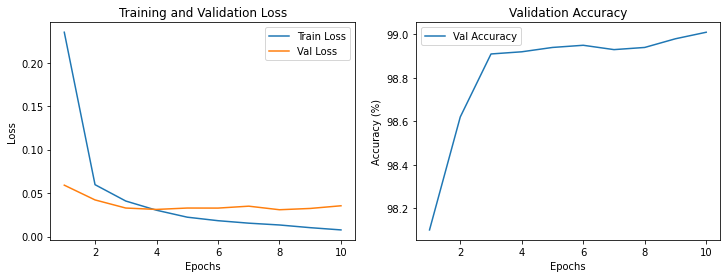

Accuracy on test images is 99.01%


In [28]:
batch_size = best_params['batch_size']
learning_rate = best_params['learning_rate']
optimizer_name = best_params['optimizer']

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()

if optimizer_name == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
elif optimizer_name == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

trainer = MNISTTrainer(model, trainloader, testloader, criterion, optimizer, device)
trainer.train(epochs=10)
accuracy = test_model(model, testloader, device)

## Saving your model
Using `torch.save`, save your model for future loading.

In [29]:
## YOUR CODE HERE ##
def save_model(model, path='mnist_model.pth'):
    """
    Save the trained model to a file.

    Args:
        model (nn.Module): The neural network model to save.
        path (str, optional): Path to save the model file. Defaults to 'mnist_model.pth'.
    """
    torch.save(model.state_dict(), path)
    print(f'Model saved to {path}')

In [30]:
save_model(model, path='mnist_model.pth')

Model saved to mnist_model.pth
